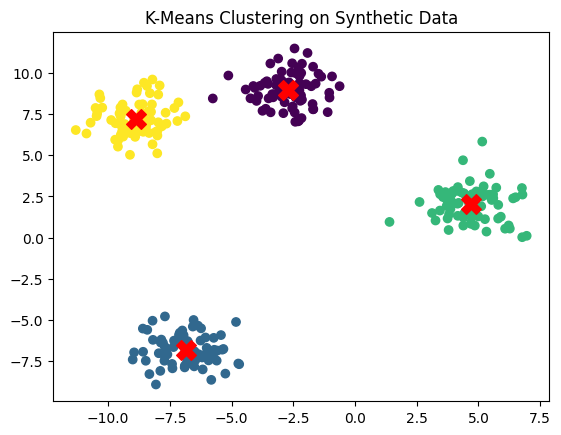

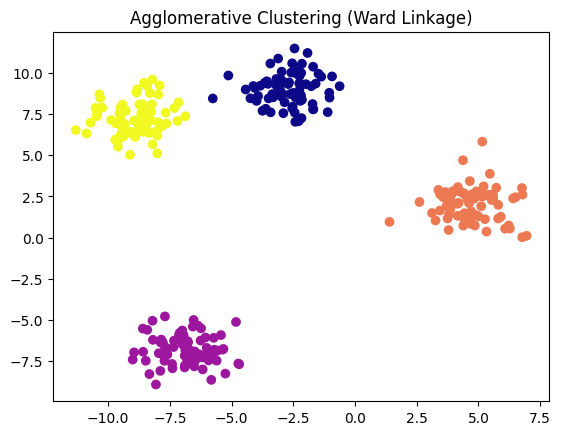

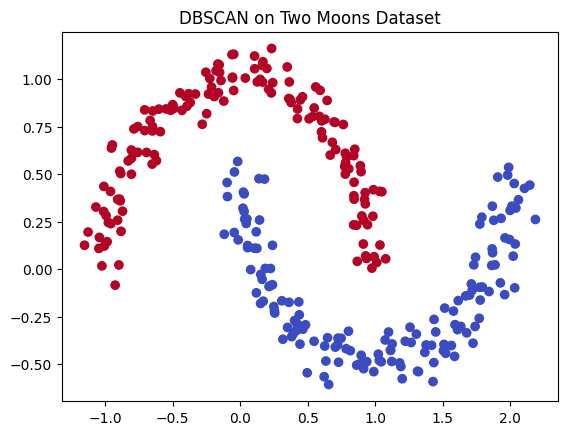

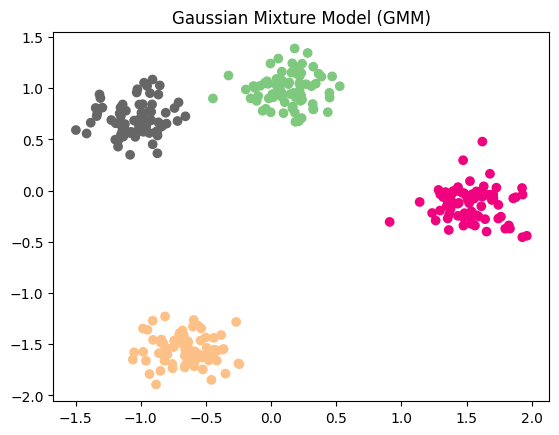

Silhouette Score for GMM: 0.7974739889632732


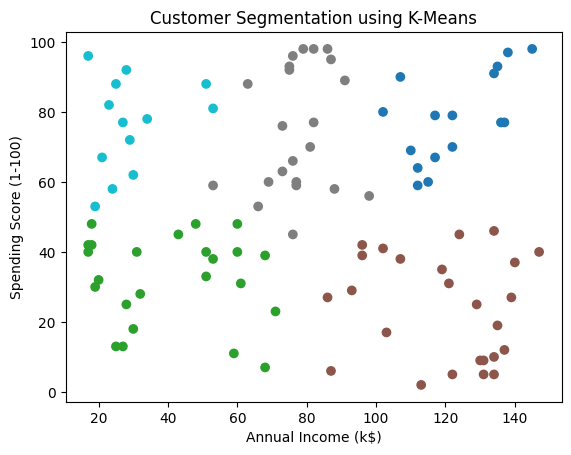

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                122.562500               78.125000
1                 40.625000               32.250000
2                119.600000               24.040000
3                 77.409091               74.954545
4                 29.307692               76.461538


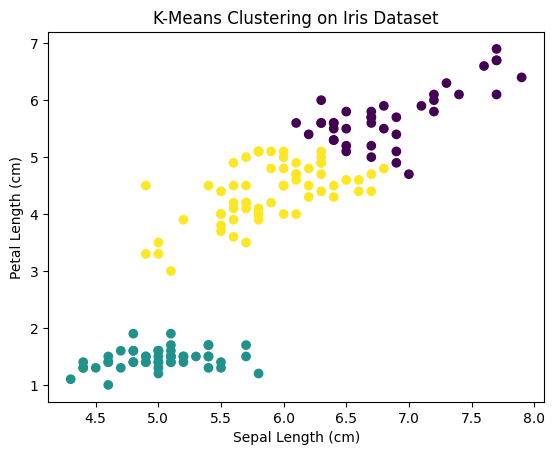

Predicted Cluster  True Species
0                  1                3
                   2               36
1                  0               50
2                  1               47
                   2               14
dtype: int64
Silhouette Score (Wine dataset): 0.2848589191898987


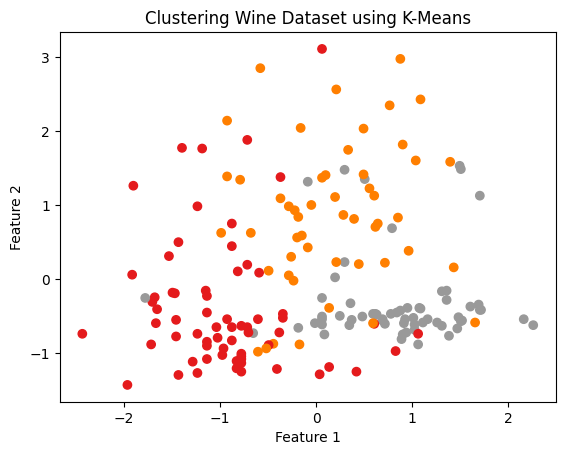

       Algorithm                               Best For  \
0        K-Means            Spherical clusters, known K   
1  Agglomerative                Hierarchical structures   
2         DBSCAN               Irregular shapes & noise   
3            GMM  Soft clustering, ellipsoidal clusters   

             Key Hyperparameters  
0     n_clusters, init, max_iter  
1  n_clusters, linkage, affinity  
2               eps, min_samples  
3  n_components, covariance_type  


'\nTASK:\n1. Download a dataset (e.g., Mall Customers, Vehicle Data).\n2. Apply K-Means, DBSCAN, and GMM.\n3. Compare using Silhouette Score.\n4. Visualize clusters using PCA or t-SNE.\n5. Discuss which algorithm works best and why.\n'

In [1]:
# Clustering in Machine Learning - Practical Notebook for BSc (Hons) AI (Year 3)
# University of Moratuwa, Faculty of Information Technology
# Author: Prof. Thushari Silva
# ---------------------------------------------------------------
# This notebook introduces major clustering techniques with examples,
# including real-world applications.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_iris, load_wine
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# -----------------------------
# 1. Synthetic Example (Blobs)
# -----------------------------
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_blobs)

plt.scatter(X_blobs[:,0], X_blobs[:,1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X', s=200)
plt.title('K-Means Clustering on Synthetic Data')
plt.show()

# -----------------------------
# 2. Hierarchical Clustering
# -----------------------------
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg.fit_predict(X_blobs)

plt.scatter(X_blobs[:,0], X_blobs[:,1], c=agg_labels, cmap='plasma')
plt.title('Agglomerative Clustering (Ward Linkage)')
plt.show()

# -----------------------------
# 3. DBSCAN on Non-Spherical Data
# -----------------------------
X_moons, y_moons = make_moons(n_samples=300, noise=0.07)

dbscan = DBSCAN(eps=0.3, min_samples=5)
db_labels = dbscan.fit_predict(X_moons)

plt.scatter(X_moons[:,0], X_moons[:,1], c=db_labels, cmap='coolwarm')
plt.title('DBSCAN on Two Moons Dataset')
plt.show()

# -----------------------------
# 4. Gaussian Mixture Model
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_blobs)

gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=gmm_labels, cmap='Accent')
plt.title('Gaussian Mixture Model (GMM)')
plt.show()

sil_score = silhouette_score(X_scaled, gmm_labels)
print('Silhouette Score for GMM:', sil_score)

# ================================================================
# 6. Real-World Example 1: Customer Segmentation
# ================================================================
customer_data = pd.DataFrame({
    'Annual Income (k$)': np.random.randint(15, 150, 100),
    'Spending Score (1-100)': np.random.randint(1, 100, 100)
})

X = customer_data.values

kmeans = KMeans(n_clusters=5, random_state=42)
customer_labels = kmeans.fit_predict(X)

plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], c=customer_labels, cmap='tab10')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

customer_data['Cluster'] = customer_labels
print(customer_data.groupby('Cluster').mean())

# ================================================================
# 7. Real-World Example 2: Iris Dataset Clustering
# ================================================================
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

kmeans_iris = KMeans(n_clusters=3, random_state=42)
iris_labels = kmeans_iris.fit_predict(X_iris)

plt.scatter(X_iris['sepal length (cm)'], X_iris['petal length (cm)'], c=iris_labels, cmap='viridis')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

comparison = pd.DataFrame({'Predicted Cluster': iris_labels, 'True Species': iris.target})
print(comparison.groupby(['Predicted Cluster', 'True Species']).size())

# ================================================================
# 8. Real-World Example 3: Wine Dataset
# ================================================================
wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

kmeans_wine = KMeans(n_clusters=3, random_state=42)
wine_labels = kmeans_wine.fit_predict(X_wine_scaled)

sil_score_wine = silhouette_score(X_wine_scaled, wine_labels)
print('Silhouette Score (Wine dataset):', sil_score_wine)

plt.scatter(X_wine_scaled[:,0], X_wine_scaled[:,1], c=wine_labels, cmap='Set1')
plt.title('Clustering Wine Dataset using K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# ================================================================
# 9. Summary Table of Techniques
# ================================================================
summary = pd.DataFrame({
    'Algorithm': ['K-Means', 'Agglomerative', 'DBSCAN', 'GMM'],
    'Best For': [
        'Spherical clusters, known K',
        'Hierarchical structures',
        'Irregular shapes & noise',
        'Soft clustering, ellipsoidal clusters'
    ],
    'Key Hyperparameters': [
        'n_clusters, init, max_iter',
        'n_clusters, linkage, affinity',
        'eps, min_samples',
        'n_components, covariance_type'
    ]
})
print(summary)

# ================================================================
# 10. Student Exercise
# ================================================================
"""
TASK:
1. Download a dataset (e.g., Mall Customers, Vehicle Data).
2. Apply K-Means, DBSCAN, and GMM.
3. Compare using Silhouette Score.
4. Visualize clusters using PCA or t-SNE.
5. Discuss which algorithm works best and why.
"""
